___
# Random Forest Classifier

Example of running it
___

## Import Libraries

In [52]:
## remove this, this is for my personal pc setup
import sys; import os; sys.path.append(os.path.expanduser('~/DropBox/my/projects/T/'))

In [19]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import pandas   as pd
import operator as op

import numpy             as np
import seaborn           as sns
from datetime import datetime

import pyscope
from pyscope import read_ss

from IPython.display import IFrame

from T import * # want T to be accessible


%load_ext autoreload
%autoreload

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

np.seterr(divide='ignore', invalid='ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

## Data

Setting up test data to look at

In [20]:
a = T(np.random.normal(0, size=(1000,1)), columns=["values"])
a['label'] = '1'
b = T(np.random.normal(5, size=(1000,1)), columns=["values"])
b['label'] = '0'

train = pd.concat([a, b])

train.head()

,values,label
0,0.643586,1
1,-0.655334,1
2,-0.747376,1
3,-2.002372,1
4,0.113250,1


## EDA

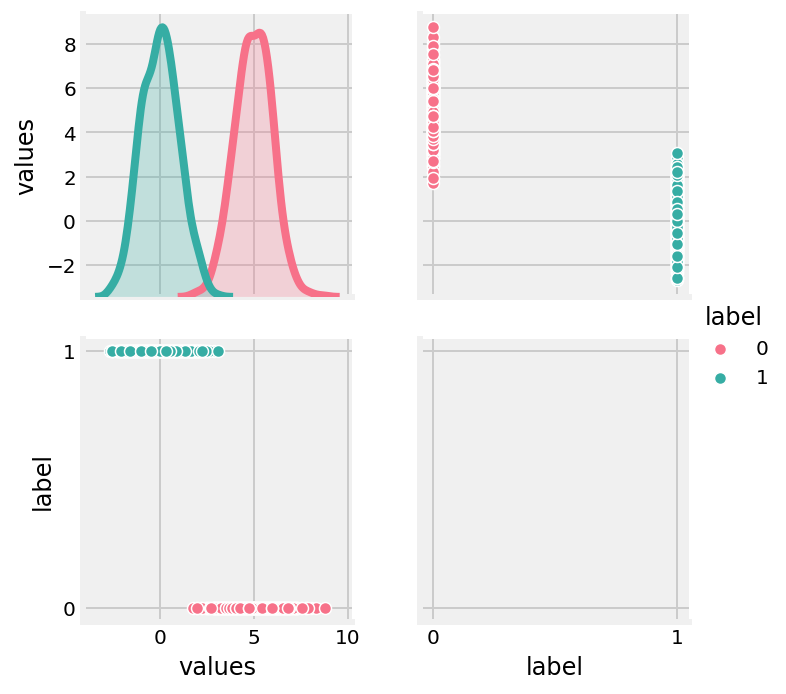

In [21]:
sns.pairplot(train,hue="label",palette="husl")

## Split Train & Test 

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('label',axis=1), 
                                                    train['label'], test_size=0.30, 
                                                    random_state=101)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
X_train

array([[-0.65107979],
       [-1.87999973],
       [ 0.74943092],
       ...,
       [ 0.90711831],
       [ 1.26299397],
       [-1.5034256 ]])

## Training & Predicting

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [31]:
predictions = rfc.predict(X_test)

## Evaluation

In [47]:
from IPython.display import IFrame

IFrame('https://cdn-images-1.medium.com/max/1600/1*CPnO_bcdbE8FXTejQiV2dg.png', 760, 315)

In [48]:
from sklearn.metrics import classification_report

In [49]:
IFrame('https://www.researchgate.net/profile/A_Prugel-Bennett/publication/312203449/figure/tbl1/AS:613952941735973@1523389196941/Classification-performance-measurement.png', 760, 315)


In [50]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       311
           1       0.98      1.00      0.99       289

   micro avg       0.99      0.99      0.99       600
   macro avg       0.99      0.99      0.99       600
weighted avg       0.99      0.99      0.99       600

